### Exam 8th June 2023

A holding of gyms requires implementing a simple management system for its admissions, written in Python.

##### Ex 1
Write the code to handle a class Admission. Each admission has a person-name, date, and a paid fee in Euros.
Then, write the code for a class Gym, whose constructor sets a name, an address, a list of Admissions, and an empty dictionary of lists of paid fees - divided by season (‘winter’, ‘spring’, ‘summer’, and ‘autumn’). Implement the method *add_admissions*, which allows us to add many admissions altogether and then updates the seasons' dictionary accordingly.

In [112]:
from datetime import datetime
def extract_season(date):
    datetime.strptime(date, '%Y-%m-%d')
    check= date[5:]
    if check>='12-22' or check<'03-21':
        return 'winter'
    elif check>='03-21' and check<'06-21':
        return 'spring'
    elif check>='06-21' and check<'09-23':
        return 'summer'
    elif check>='09-23'and check<'12-22':
        return 'autumn'


class Admission:
    def __init__(self, name, date,fee):
        self.person_name= name
        self.date=date
        self.paid_fee= fee
    def __str__(self):
        return f'{self.person_name}, {self.date}, {self.paid_fee}'

class Gym:
    def __init__(self, name, address):
        self.name= name
        self.address=address
        self.admission_list=[]
        self.season_dict={'winter':[], 'spring':[], 'summer':[], 'autumn':[]}

    def __str__(self):
        return f'{self.name}, {self.address}, {self.admission_list}, {self.season_dict}'

    def __iter__(self):
        return iter(self.admission_list)

    def add_admissions(self, admission:list):
        self.admission_list.extend(admission)
        for ad in admission:
            season= extract_season(ad.date)
            self.season_dict[season].append(ad.paid_fee)







In [108]:
a=extract_season('2023-03-01')
print(a)

winter


##### Ex 2
Different Gyms can be gathered under the umbrella of a SuperGym that includes them. Write the code for the
SuperGym class, which has a name and a list of the included Gyms (**inserted at construction-time**, i.e., at the time when a new SuperGym instance is created). Moreover, it saves a list of lists of admissions of the Gyms.

In [117]:
class SuperGym:
    def __init__(self, name,gyms:list):
        self.name= name
        self.gyms=gyms
        self.admissions_lists=[gym.admission_list for gym in self.gyms]
        self.sg_season_fees= self.merge_season_dict()
        self.sg_tot_revenue= self.tot_revenue( [[ad.paid_fee for ad in  gym.admission_list] for gym in self.gyms])

    def __str__(self):
        return f'{self.name}, {self.gyms}, {self.admissions_lists}'

    def merge_season_dict(self):
        superseason_dict={}
        for gym in self.gyms:
            for ky,vl in gym.season_dict.items():
                if ky not in superseason_dict:
                    superseason_dict[ky]=vl
                else:
                    superseason_dict[ky].extend(vl)
        return superseason_dict


    def tot_revenue(self, lsofls:list):
        #sums =sum([int(ad.paid_fee)for gym in self.gyms for ad in  gym.admission_list])
        sums=sum([int(col) for row in lsofls for col in  row])
        return sums

    def print_report(self):
          with open('supergym.tsv', 'w') as f:
             ad_lists= '\n'.join([str(ad) for gym in self.gyms for ad in gym.admission_list])
             sup_dict= str(self.sg_season_fees)
             mx={key:max(vl) for key, vl in self.sg_season_fees.items() if len(vl)>0}
             mx=f'the max paid fee overall: {max(mx.values())}'
             f.write(f'{ad_lists}\n{sup_dict}\n{mx}\n')



##### Ex 3
In the main code, build two different Gym objects. Fill them with some example Admissions. Then, create a
SuperGym that includes the existing Gyms.

In [120]:
a1 = Admission('anna','2023-03-01',10)
a2 = Admission('marco','2023-11-03',12)
g1 = Gym('Bacone','Via plinio')
g1.add_admissions([a1,a2])

a3 = Admission('laura','2023-01-31',11)
a4 = Admission('laura','2023-07-31',8)
a5 = Admission('laura','2023-08-31',5)
a6 = Admission('marco','2023-12-03',13)
g2 = Gym('XXXX','Via plinio')
g2.add_admissions([a3,a4,a5,a6])

s = SuperGym('mega',[g1,g2])

s.print_report()


In [121]:
admission1= Admission('Alice', '2024-05-13', 120)
admission2= Admission('Bob', '2024-01-13', 170)
admission3 =Admission('Carol', '2024-12-13', 180)
admission4= Admission('Chris', '2022-08-13', 180)
gym1=Gym('2Fit', 'Via Mezzore')
gym2=Gym('Fit Camp', 'Via Sansiro')
gym1.add_admissions([admission1,admission2])
gym2.add_admissions([admission3,admission4])
supergym=SuperGym('Milano campus',[gym1,gym2])

supergym.print_report()

##### Ex 4
Implement the method *merge_season_dict* of SuperGym, which builds a new seasons-dictionary, starting
from the dictionaries of the different Gyms contained in the SuperGym, in such a way that each season list will
contain all the paid fees, without distinction of their gym of provenance.

**Note**: this method should be called inside the constructor of SuperGym, i.e., to set the value of the attribute *sg_season_fees*.

##### Ex 5
Implement the method *tot_revenue* of SuperGym, which calculates the total revenue of the SuperGym, taking in input the list of lists of paid fees for each admission.

**Note**: this method should be called inside the constructor of SuperGym, i.e., setting the value of the attribute *sg_tot_revenue*.

##### EX 6
Implement the method print_report of SuperGym, which prints the report of a SuperGym instance in the text
file “supergym.tsv”, where the list of admissions of its first Gym is printed, then the list of admissions of its second
Gym… and so on, for each Gym included in the SuperGym. At the end, it also prints:

a) the season fees dictionary (computed in exercise 4)

b) the max value of the season fees dictionary (i.e., the max paid fee overall)

##### EX 7
In the main code, draw four boxplots in one figure, representing the paid fees of each separate season for the
SuperGym you instantiated. Labels on the x-axis are the four seasons.

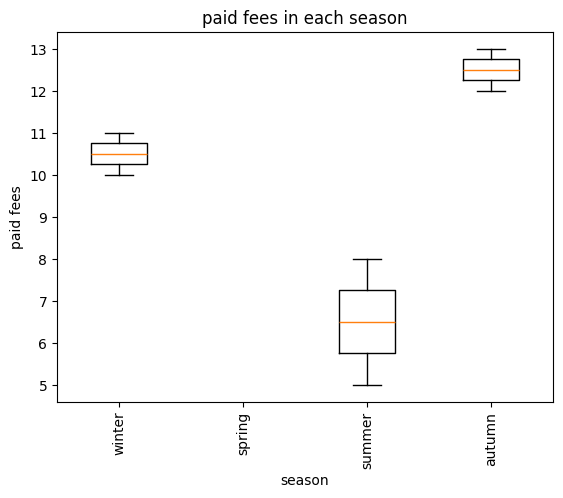

In [124]:
import matplotlib.pyplot as plt
x=[ky for ky in s.sg_season_fees.keys()]
y=[vl for vl in s.sg_season_fees.values()]
plt.boxplot(y)
plt.xticks([1,2,3,4],x,rotation=90)
plt.title('paid fees in each season')
plt.ylabel('paid fees')
plt.xlabel('season')
plt.show()


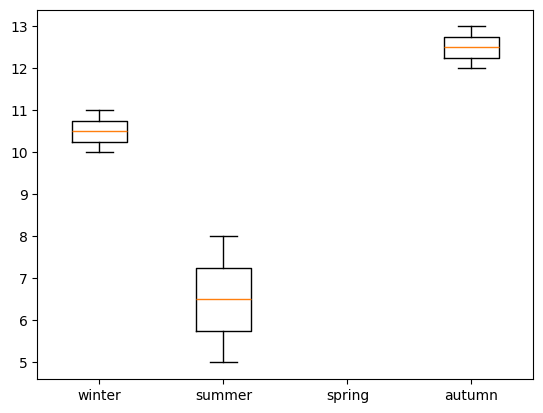

In [39]:
class Admission:
    def __init__(self,name,date,paidfee):
        self.name = name
        self.date = date
        self.fee = paidfee
class Gym:
    def __init__(self,nameg,address):
        self.nameg = nameg
        self.address = address
        self.list_adm = []
        self.d_seasonfees = {'winter':[],'autumn':[],'spring':[],'summer':[]}
        
    def add_admissions(self,ads):
        ##self.list_adm += ads
        self.list_adm.extend(ads)
        for a in ads:
            date = a.date[5:]
            if date > "03-21" and date <= "06-21":
                self.d_seasonfees["spring"].append(a.fee)
            elif date >"06-21" and date <= "09-23":
                self.d_seasonfees["summer"].append(a.fee)
            elif date >"09-23" and date <= "12-21":
                self.d_seasonfees["autumn"].append(a.fee)
            else:
                self.d_seasonfees["winter"].append(a.fee)
                
class SuperGym:
    def __init__(self,name,listgyms):
        self.name = name
        self.list_gyms = listgyms
        self.ll_adms = []
        for gym in self.list_gyms:
            self.ll_adms.append(gym.list_adm)
        self.sg_season_fees = self.merge_season_dict()
        llpf = [[adm.fee for adm in list_adms] for list_adms in self.ll_adms] 
        self.sg_tot_revenue = self.tot_revenue(llpf)
            
    def merge_season_dict(self):
        new_dict = {"winter":[],"summer":[],"spring":[],"autumn":[]}
        for gym in self.list_gyms:
            for season,fees in gym.d_seasonfees.items():
                new_dict[season].extend(fees)
        return new_dict
    
    def tot_revenue(self,llp): 
        return sum([sum(sl) for sl in llp])   
            
    def print_report(self):        
        with open('supergym.tsv','w') as f:
            for g in self.list_gyms:
                adm_string = '\n'.join([adm.name+','+adm.date+','+str(adm.fee) for adm in g.list_adm])
                f.write(f'\n{g.nameg}:\n{adm_string}')
            f.write(f'\nSum of paid fees: {self.tot_revenue}\n')
            f.write(f'Merged seasonal dict: {self.sg_season_fees}\n')
            f.write(f'Max of merged seasonal dict: {max([max(fees) for fees in self.sg_season_fees.values() if len(fees)>0])}\n')


a1 = Admission('anna','2023-03-01',10)
a2 = Admission('marco','2023-11-03',12)
g1 = Gym('Bacone','Via plinio')
g1.add_admissions([a1,a2])

a3 = Admission('laura','2023-01-31',11)
a4 = Admission('laura','2023-07-31',8)
a5 = Admission('laura','2023-08-31',5)
a6 = Admission('marco','2023-12-03',13)
g2 = Gym('XXXX','Via plinio')
g2.add_admissions([a3,a4,a5,a6])

s = SuperGym('mega',[g1,g2])

s.print_report()

######ex7
import matplotlib.pyplot as plt
plt.boxplot([s.sg_season_fees[season] for season in s.sg_season_fees.keys()])
plt.xticks([1,2,3,4],[season for season in s.sg_season_fees.keys()])
plt.show()

In [7]:
|#note on lists

l1 = [1,2,3]
l2 = [1,2,4]
l3 = l1+l2
l4 = l1.extend(l2)
print(type(l3),l3)
print(type(l4),l4)
print(type(l1),l1)
l5 = l1.append(l2)
print(type(l5),l5)
print(type(l1),l1)

<class 'list'> [1, 2, 3, 1, 2, 4]
<class 'NoneType'> None
<class 'list'> [1, 2, 3, 1, 2, 4]
<class 'NoneType'> None
<class 'list'> [1, 2, 3, 1, 2, 4, [1, 2, 4]]
